In [10]:
import pandas as pd
from pprintpp import pprint as pp
import numpy as np 
import altair as alt
from vega_datasets import data
import random
import glob
import os

In [16]:
df = pd.concat(map(pd.read_csv, ['19-03.csv', '19-04.csv', '19-05.csv', '19-06.csv', '19-07.csv', '19-08.csv', '19-09.csv', '19-10.csv', '19-11.csv', '19-12.csv', '20-01.csv', '20-02.csv', '20-03.csv', '20-04.csv', '20-05.csv', '20-06.csv', '20-07.csv', '20-08.csv', '20-09.csv', '20-10.csv', '20-11.csv', '20-12.csv', '21-01.csv', '21-02.csv', '21-03.csv']))

In [17]:
len(df)

41371557

In [35]:
df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ride_length
0,1463,2019-03-01 00:00:16.097,2019-03-01 00:24:39.388,319.0,Fulton St & Broadway,40.711066,-74.009447,347.0,Greenwich St & W Houston St,40.728846,-74.008591,35618,Subscriber,1989,1,0 days 00:24:23.291000
1,285,2019-03-01 00:00:32.385,2019-03-01 00:05:18.183,439.0,E 4 St & 2 Ave,40.726281,-73.989780,150.0,E 2 St & Avenue C,40.720874,-73.980858,31113,Subscriber,1980,1,0 days 00:04:45.798000
2,686,2019-03-01 00:00:47.797,2019-03-01 00:12:14.309,526.0,E 33 St & 5 Ave,40.747659,-73.984907,3474.0,6 Ave & Spring St,40.725256,-74.004121,19617,Subscriber,1987,1,0 days 00:11:26.512000
3,442,2019-03-01 00:01:01.209,2019-03-01 00:08:23.751,3474.0,6 Ave & Spring St,40.725256,-74.004121,355.0,Bayard St & Baxter St,40.716021,-73.999744,27086,Subscriber,1987,2,0 days 00:07:22.542000
4,2913,2019-03-01 00:01:09.281,2019-03-01 00:49:42.381,379.0,W 31 St & 7 Ave,40.749156,-73.991600,212.0,W 16 St & The High Line,40.743349,-74.006818,34791,Subscriber,1991,1,0 days 00:48:33.100000
5,1682,2019-03-01 00:01:27.115,2019-03-01 00:29:29.753,3232.0,Bond St & Fulton St,40.689622,-73.983043,3058.0,Lewis Ave & Kosciuszko St,40.692371,-73.937054,32906,Subscriber,1986,1,0 days 00:28:02.638000
6,769,2019-03-01 00:01:30.059,2019-03-01 00:14:19.917,377.0,6 Ave & Canal St,40.722438,-74.005664,311.0,Norfolk St & Broome St,40.717227,-73.988021,16223,Subscriber,1987,1,0 days 00:12:49.858000
7,483,2019-03-01 00:01:33.096,2019-03-01 00:09:36.443,2010.0,Grand St & Greene St,40.721655,-74.002347,316.0,Fulton St & William St,40.709560,-74.006536,15657,Subscriber,1974,1,0 days 00:08:03.347000
8,472,2019-03-01 00:01:37.024,2019-03-01 00:09:29.448,3082.0,Hope St & Union Ave,40.711674,-73.951413,3113.0,Greenpoint Ave & Manhattan Ave,40.730260,-73.953940,26822,Subscriber,1985,1,0 days 00:07:52.424000
9,3198,2019-03-01 00:02:01.694,2019-03-01 00:55:20.636,3461.0,Murray St & Greenwich St,40.714852,-74.011223,327.0,Vesey Pl & River Terrace,40.715338,-74.016584,35552,Subscriber,1995,1,0 days 00:53:18.942000


In [21]:
df['starttime'] = pd.to_datetime(df.starttime)
df['stoptime'] = pd.to_datetime(df.stoptime)

In [34]:
df['ride_length'] = df['stoptime'] - df['starttime']

In [24]:
counts = df['starttime'].groupby([df.starttime.dt.year, df.starttime.dt.month]).agg('count').to_frame()

<AxesSubplot:xlabel='starttime,starttime'>

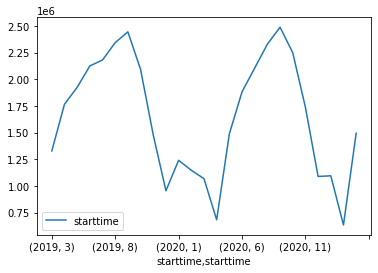

In [25]:
counts.plot()

In [31]:
counts.to_csv("citibike-month-counts.csv")

In [47]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ride_length
0,1463,2019-03-01 00:00:16.097,2019-03-01 00:24:39.388,319.0,Fulton St & Broadway,40.711066,-74.009447,347.0,Greenwich St & W Houston St,40.728846,-74.008591,35618,Subscriber,1989,1,0 days 00:24:23.291000
1,285,2019-03-01 00:00:32.385,2019-03-01 00:05:18.183,439.0,E 4 St & 2 Ave,40.726281,-73.989780,150.0,E 2 St & Avenue C,40.720874,-73.980858,31113,Subscriber,1980,1,0 days 00:04:45.798000
2,686,2019-03-01 00:00:47.797,2019-03-01 00:12:14.309,526.0,E 33 St & 5 Ave,40.747659,-73.984907,3474.0,6 Ave & Spring St,40.725256,-74.004121,19617,Subscriber,1987,1,0 days 00:11:26.512000
3,442,2019-03-01 00:01:01.209,2019-03-01 00:08:23.751,3474.0,6 Ave & Spring St,40.725256,-74.004121,355.0,Bayard St & Baxter St,40.716021,-73.999744,27086,Subscriber,1987,2,0 days 00:07:22.542000
4,2913,2019-03-01 00:01:09.281,2019-03-01 00:49:42.381,379.0,W 31 St & 7 Ave,40.749156,-73.991600,212.0,W 16 St & The High Line,40.743349,-74.006818,34791,Subscriber,1991,1,0 days 00:48:33.100000


In [49]:
monthly_median_stats = df.groupby([df.starttime.dt.year, df.starttime.dt.month]).median()
monthly_median_stats.to_csv("monthly_median_stats.csv")

In [44]:
df.groupby([df.starttime.dt.year, df.starttime.dt.month]).head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ride_length
0,1463,2019-03-01 00:00:16.097,2019-03-01 00:24:39.388,319.0,Fulton St & Broadway,40.711066,-74.009447,347.0,Greenwich St & W Houston St,40.728846,-74.008591,35618,Subscriber,1989,1,0 days 00:24:23.291000
1,285,2019-03-01 00:00:32.385,2019-03-01 00:05:18.183,439.0,E 4 St & 2 Ave,40.726281,-73.989780,150.0,E 2 St & Avenue C,40.720874,-73.980858,31113,Subscriber,1980,1,0 days 00:04:45.798000
2,686,2019-03-01 00:00:47.797,2019-03-01 00:12:14.309,526.0,E 33 St & 5 Ave,40.747659,-73.984907,3474.0,6 Ave & Spring St,40.725256,-74.004121,19617,Subscriber,1987,1,0 days 00:11:26.512000
3,442,2019-03-01 00:01:01.209,2019-03-01 00:08:23.751,3474.0,6 Ave & Spring St,40.725256,-74.004121,355.0,Bayard St & Baxter St,40.716021,-73.999744,27086,Subscriber,1987,2,0 days 00:07:22.542000
4,2913,2019-03-01 00:01:09.281,2019-03-01 00:49:42.381,379.0,W 31 St & 7 Ave,40.749156,-73.991600,212.0,W 16 St & The High Line,40.743349,-74.006818,34791,Subscriber,1991,1,0 days 00:48:33.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,4841,2021-03-01 00:00:07.965,2021-03-01 01:20:49.319,4325.0,21 Ave & 80 St,40.770888,-73.889914,4068.0,Fort Washington Ave & W 183 St,40.852252,-73.937854,47848,Customer,1970,0,0 days 01:20:41.354000
6,282,2021-03-01 00:00:08.227,2021-03-01 00:04:50.232,3134.0,3 Ave & E 62 St,40.763126,-73.965269,3355.0,E 66 St & Madison Ave,40.768009,-73.968453,47323,Customer,1970,0,0 days 00:04:42.005000
7,185,2021-03-01 00:00:08.850,2021-03-01 00:03:14.354,275.0,Washington Ave & Greene Ave,40.686501,-73.965633,353.0,S Portland Ave & Hanson Pl,40.685396,-73.974315,47972,Customer,1970,0,0 days 00:03:05.504000
8,269,2021-03-01 00:00:12.221,2021-03-01 00:04:42.176,238.0,Bank St & Washington St,40.736197,-74.008592,347.0,Greenwich St & W Houston St,40.728846,-74.008591,20246,Customer,1970,0,0 days 00:04:29.955000


4.75